In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
# include your Project 1 Decision Tree Model as well
#from DT_alex_pang import DecisionTreeModel

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [4]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

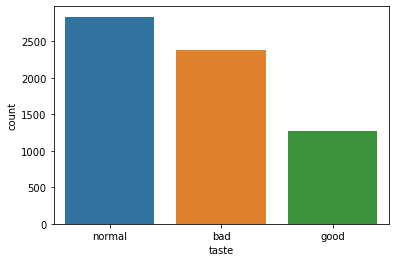

In [5]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

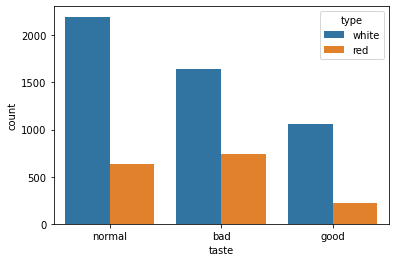

In [6]:
sns.countplot(x='taste', hue='type', data=df)

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

## EDA

### Checking for nulls and dropping them

In [7]:
df.isnull().any()

fixed acidity            True
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [8]:
df = df[df['fixed acidity'].notna()]

In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

### Removing Outliers

<AxesSubplot:xlabel='alcohol'>

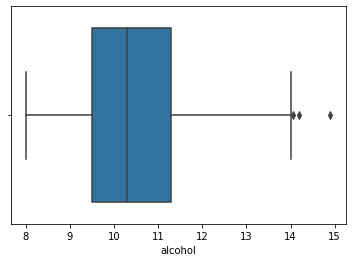

In [10]:
sns.boxplot(x = df['alcohol'])

<AxesSubplot:xlabel='fixed acidity'>

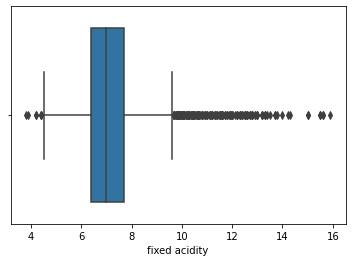

In [11]:
sns.boxplot(x = df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity'>

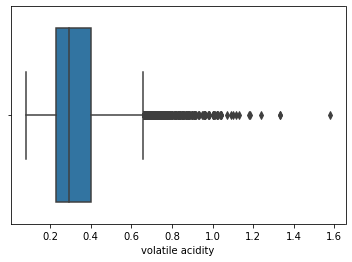

In [12]:
sns.boxplot(x = df['volatile acidity'])

<AxesSubplot:xlabel='citric acid'>

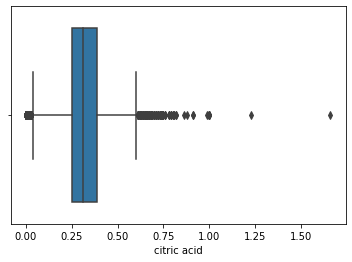

In [13]:
sns.boxplot(x = df['citric acid'])

<AxesSubplot:xlabel='residual sugar'>

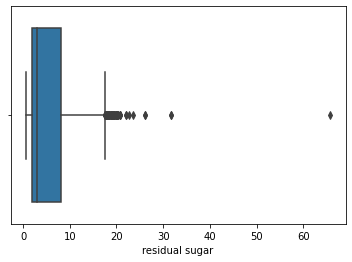

In [14]:
sns.boxplot(x = df['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

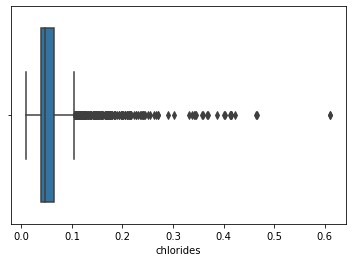

In [15]:
sns.boxplot(x = df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

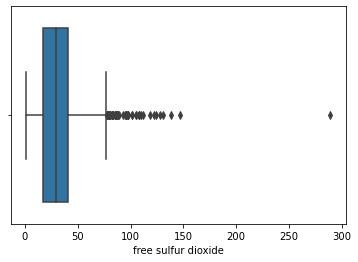

In [16]:
sns.boxplot(x = df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

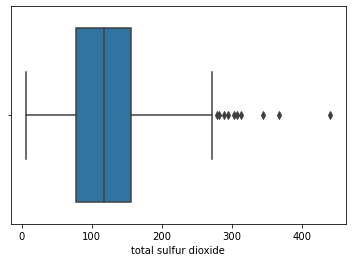

In [17]:
sns.boxplot(x = df['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates'>

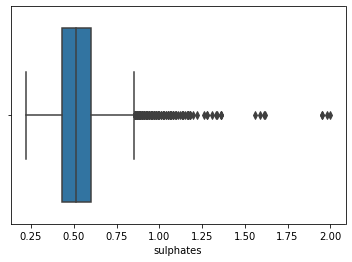

In [18]:
sns.boxplot(x = df['sulphates'])

<AxesSubplot:xlabel='density', ylabel='taste'>

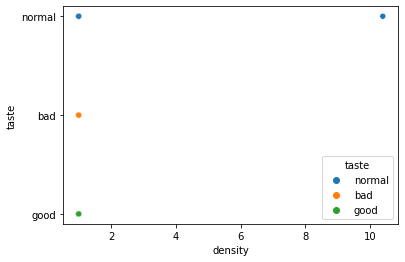

In [19]:
sns.scatterplot(data=df, x="density", y="taste", hue = "taste")

In [20]:
df.shape


(6497, 13)

In [21]:
df = df[df['fixed acidity'] <15]
df = df[df['volatile acidity'] <2]
df = df[df['citric acid'] <1.25]
df = df[df['residual sugar'] <40]
df = df[df['chlorides'] <0.5]
df = df[df['free sulfur dioxide'] <200]
df = df[df['total sulfur dioxide'] <400]
df = df[df['sulphates'] <1.75]
df = df[df['density'] <2]

In [22]:
df.shape

(6482, 13)

### setup dummy variables to take care categorical variables

#### I put "good" as 1 and "bad" and "Normal" as 0

In [23]:
df['taste'] = df['taste'].apply(lambda x: 1 if x == 'good' else 0)

In [24]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,0.45,11.0,white,quite acidic,0


In [25]:
Type =pd.get_dummies(df['type'])
pHValue =pd.get_dummies(df['pHValue'])


In [26]:
Type.columns = ['white', 'red']
pHValue.columns = ['very-acidic','quite-acidic','midly-acidic', 'extremly-acidic', 'acidic', "other"]

In [27]:
numerical_values = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol','taste' ]
numerical_df = df[numerical_values]
df = pd.concat([numerical_df, Type, pHValue], axis=1)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,white,red,very-acidic,quite-acidic,midly-acidic,extremly-acidic,acidic,other
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,0,1,0,0,0,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,0,1,0,0,0,0,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,0,1,0,0,0,0,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1,0,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1,0,0,0,0,0,1


### performed basic exploration of relationship, with plots and graphs

In [28]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,white,red,very-acidic,quite-acidic,midly-acidic,extremly-acidic,acidic,other
fixed acidity,1.000000,0.217168,0.323153,-0.114478,0.304954,-0.284202,-0.326928,0.461135,0.297303,-0.101399,-0.054136,0.485680,-0.485680,-0.111675,0.098293,-0.053395,-0.145812,-0.056176,0.131857
volatile acidity,0.217168,1.000000,-0.385910,-0.206157,0.387817,-0.356399,-0.415776,0.265037,0.226352,-0.038745,-0.151520,0.654103,-0.654103,0.065842,-0.114274,0.024349,0.177392,0.076168,-0.150651
citric acid,0.323153,-0.385910,1.000000,0.143941,0.020864,0.140449,0.201905,0.090896,0.046920,-0.013546,0.055437,-0.193859,0.193859,-0.112530,0.108030,-0.040081,-0.221789,-0.085308,0.204837
residual sugar,-0.114478,-0.206157,0.143941,1.000000,-0.133455,0.418379,0.502196,0.542769,-0.191595,-0.367309,-0.063760,-0.351863,0.351863,-0.064603,0.134663,-0.027316,-0.147149,-0.133112,0.177039
chlorides,0.304954,0.387817,0.020864,-0.133455,1.000000,-0.201434,-0.285844,0.375114,0.378372,-0.263956,-0.166405,0.523715,-0.523715,0.020753,-0.041388,-0.010496,0.043562,0.009185,-0.020390
free sulfur dioxide,-0.284202,-0.356399,0.140449,0.418379,-0.201434,1.000000,0.721761,0.034252,-0.194163,-0.183249,0.016725,-0.477301,0.477301,-0.033264,0.025647,-0.015819,-0.086665,-0.096857,0.149578
total sulfur dioxide,-0.326928,-0.415776,0.201905,0.502196,-0.285844,0.721761,1.000000,0.035866,-0.283670,-0.267187,-0.050096,-0.701577,0.701577,-0.055852,0.051574,-0.013312,-0.156818,-0.121381,0.211857
density,0.461135,0.265037,0.090896,0.542769,0.375114,0.034252,0.035866,1.000000,0.260387,-0.704854,-0.281442,0.395472,-0.395472,0.010077,-0.001712,-0.014131,0.032082,-0.023184,0.001656
sulphates,0.297303,0.226352,0.046920,-0.191595,0.378372,-0.194163,-0.283670,0.260387,1.000000,0.000278,0.037588,0.490029,-0.490029,0.088859,-0.105505,0.009788,0.118665,0.084107,-0.129290
alcohol,-0.101399,-0.038745,-0.013546,-0.367309,-0.263956,-0.183249,-0.267187,-0.704854,0.000278,1.000000,0.392446,-0.032976,0.032976,0.043970,-0.047625,0.038856,0.045548,0.069713,-0.088421


In [29]:
df.corr().filter(items=['taste']).sort_values('taste', ascending=False, key = abs)

,taste
taste,1.000000
alcohol,0.392446
density,-0.281442
chlorides,-0.166405
volatile acidity,-0.151520
white,-0.088405
red,0.088405
residual sugar,-0.063760
citric acid,0.055437
fixed acidity,-0.054136


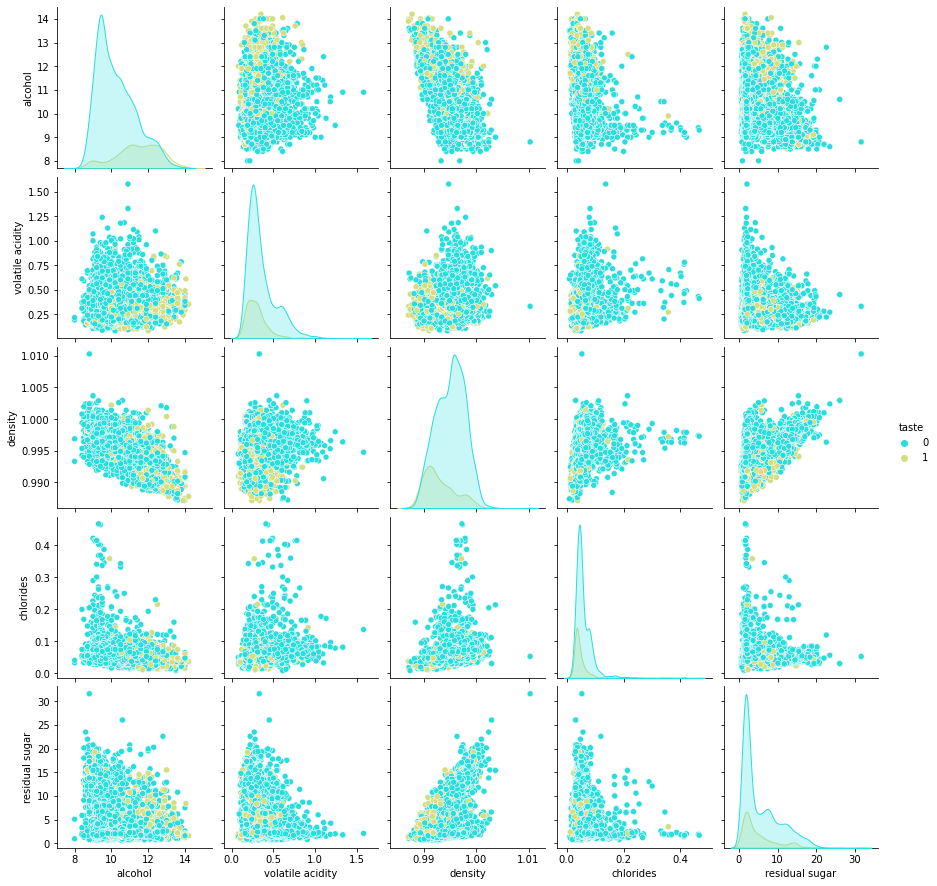

In [30]:
df_temp = df[['alcohol','volatile acidity','density', 'chlorides','residual sugar', 'taste']]
sns.pairplot(df_temp, hue='taste', palette='rainbow')

### separated data set into training and testing

### The first Model will be Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df.drop('taste',axis=1), 
                                                    df['taste'], test_size=0.20, 
                                                    random_state=101)

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
perd1 = model.predict(X_test)
print(classification_report(y_test,perd1))
print(accuracy_score(y_test, perd1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1040
           1       0.57      0.23      0.32       257

    accuracy                           0.81      1297
   macro avg       0.70      0.59      0.61      1297
weighted avg       0.78      0.81      0.78      1297

0.8134155744024673


#### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
cross

array([0.81310212, 0.80539499, 0.81310212, 0.79961464, 0.80732177,
       0.82046332, 0.80694981, 0.80694981, 0.79150579, 0.8030888 ])

#### So the accuracy is around 0.81

### The second model will be Decision Tree 

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = df.drop('taste',axis=1)
y = df['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
model1 = DecisionTreeClassifier(max_depth=4)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
predictions = model1.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1522   45]
 [ 299   79]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1567
           1       0.64      0.21      0.31       378

    accuracy                           0.82      1945
   macro avg       0.74      0.59      0.61      1945
weighted avg       0.80      0.82      0.79      1945

0.8231362467866324


In [38]:
from sklearn.model_selection import cross_val_score
accuracy = []
cross = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10)
cross

array([0.83259912, 0.81718062, 0.78854626, 0.83480176, 0.81938326,
       0.83480176, 0.82378855, 0.80794702, 0.81456954, 0.8410596 ])

#### The accuracy here is around 0.82

### The third model will be Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
X = df.drop('taste',axis=1)
y = df['taste']

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))
print(accuracy_score(y_test, y_pred))

[[  80  157]
 [1060    0]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1060
           1       0.53      0.34      0.41       237

    accuracy                           0.82      1297
   macro avg       0.70      0.64      0.66      1297
weighted avg       0.80      0.82      0.81      1297

0.8442559753276793


In [45]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
cross

array([0.89210019, 0.88631985, 0.88246628, 0.87090559, 0.87475915,
       0.87065637, 0.86679537, 0.88803089, 0.90540541, 0.88030888])

#### Accuracy around 0.844, this was higher than the Logistic Regression and Decision Tree models. The Random Forest also has a higher F1 Score.

## Can ensemble improve your models?

### The random forest model has a better accuracy and F1 Score than the decision tree and logistics regression models. So the ensemble does improve the models.

## For the best fitted model, does it work better for the Red wine or White wine or similar

#### To answer the question I created a new df without the red wine column

In [46]:
white_df = df.drop('red', axis=1)

In [47]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,white,very-acidic,quite-acidic,midly-acidic,extremly-acidic,acidic,other
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,0,0,0,0,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,0,0,0,0,0,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,0,0,0,0,0,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,0,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,0,0,0,0,0,1


#### I am using just the random forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
X = white_df.drop('taste',axis=1)
y = white_df['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  54  351]
 [1540    0]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1540
           1       0.72      0.13      0.23       405

    accuracy                           0.81      1945
   macro avg       0.77      0.56      0.56      1945
weighted avg       0.79      0.81      0.75      1945

0.8087403598971722


In [49]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
cross

array([0.89427313, 0.87665198, 0.89427313, 0.87885463, 0.89867841,
       0.88986784, 0.90088106, 0.88300221, 0.86754967, 0.88520971])

#### Using the random forest model, the accuracy without red wine is 0.808

#### Now I dropped the white wine column

In [50]:
red_df = df.drop('white', axis=1)

In [51]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,red,very-acidic,quite-acidic,midly-acidic,extremly-acidic,acidic,other
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,1,0,0,0,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,1,0,0,0,0,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,1,0,0,0,0,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,1,0,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,1,0,0,0,0,0,1


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
X = red_df.drop('taste',axis=1)
y = red_df['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  74  303]
 [1568    0]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1568
           1       0.73      0.20      0.31       377

    accuracy                           0.83      1945
   macro avg       0.78      0.59      0.61      1945
weighted avg       0.81      0.83      0.79      1945

0.8298200514138817


In [53]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
cross

array([0.87444934, 0.87444934, 0.88105727, 0.85682819, 0.88546256,
       0.85682819, 0.88546256, 0.89403974, 0.88300221, 0.88300221])

#### The accuracy for this df is 0.829

### It looks like the random forest model accuracy red_df is slightly higher than the white_df however the difference is really small and both dataframes have the similar F1 Scores, so both models are very similar. 

## Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

In [54]:
noPH_df = pd.concat([numerical_df, Type], axis=1)

In [55]:
noPH_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1


### Logistic Regression Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(noPH_df.drop('taste',axis=1), 
                                                    noPH_df['taste'], test_size=0.20, 
                                                    random_state=101)

In [57]:
model = LogisticRegression()
model.fit(X_train,y_train)
perd2 = model.predict(X_test)
print(classification_report(y_test,perd2))
print(accuracy_score(y_test, perd2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1040
           1       0.53      0.24      0.33       257

    accuracy                           0.81      1297
   macro avg       0.68      0.59      0.61      1297
weighted avg       0.77      0.81      0.78      1297

0.8072474942174248


In [58]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
cross

array([0.81310212, 0.82851638, 0.81888247, 0.80154143, 0.82466281,
       0.83976834, 0.80501931, 0.82432432, 0.80888031, 0.8030888 ])

### Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
X = noPH_df.drop('taste',axis=1)
y = noPH_df['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  82  309]
 [1554    0]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1554
           1       0.68      0.21      0.32       391

    accuracy                           0.82      1945
   macro avg       0.75      0.59      0.61      1945
weighted avg       0.80      0.82      0.78      1945

0.8210796915167096


In [60]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
cross

array([0.8722467 , 0.8876652 , 0.87004405, 0.87665198, 0.88546256,
       0.88105727, 0.87665198, 0.8807947 , 0.88520971, 0.86975717])

### With PH the logistic regression model accuracy was 0.81 and without it was 0.80. For the random forest the accuracy was 0.84 now it's 0.82. The F1 Scores were similar.
### Compared to the models that included PH, the accuracy was only a little lower for the models without PH.  So the PH is not that important.

### Overall, the Random Forest was the best Model as it had the highest accuracy. 